In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv(r"federal_funds_rate.csv")
df.head()

,date,value
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [12]:
df.dtypes

date      object
value    float64
dtype: object

In [13]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [14]:
wars = [
    ('1955-11-01', '1975-04-30'),  # Vietnam War
    ('1961-04-17', '1961-04-19'),  # Bay of Pigs Invasion
    ('1965-07-28', '1965-07-28'),  # U.S. Dominican Intervention
    ('1982-06-06', '1982-06-06'),  # Lebanon War
    ('1983-10-25', '1983-12-15'),  # Invasion of Grenada
    ('1989-12-20', '1990-01-31'),  # U.S. Invasion of Panama
    ('1990-08-02', '1991-02-28'),  # Gulf War
    ('1992-12-08', '1992-12-08'),  # U.S. Intervention in Somalia
    ('1994-09-19', '1994-09-19'),  # Operation Uphold Democracy (Haiti)
    ('1994-09-19', '1995-03-31'),  # Operation Uphold Democracy (Haiti)
    ('1999-03-24', '1999-06-10'),  # Kosovo War
    ('2001-10-07', '2014-12-28'),  # War in Afghanistan
    ('2003-03-20', '2011-12-18'),  # Iraq War
    ('2011-03-19', '2011-10-31'),  # Operation Odyssey Dawn (Libya)
    ('2014-06-15', '2021-12-18'),  # U.S. Intervention in Iraq
    ('2014-09-22', '2022-12-31'),  # U.S. Intervention in Syria
]

def is_war_period(date):
    date = pd.to_datetime(date)  # Convert date to Timestamp
    for start, end in wars:
        if pd.to_datetime(start) <= date <= pd.to_datetime(end):
            return True
    return False

In [15]:
df['war'] = df['date'].apply(is_war_period)
df.head()

,date,value,war
0,1954-07-01,0.80,False
1,1954-08-01,1.22,False
2,1954-09-01,1.07,False
3,1954-10-01,0.85,False
4,1954-11-01,0.83,False


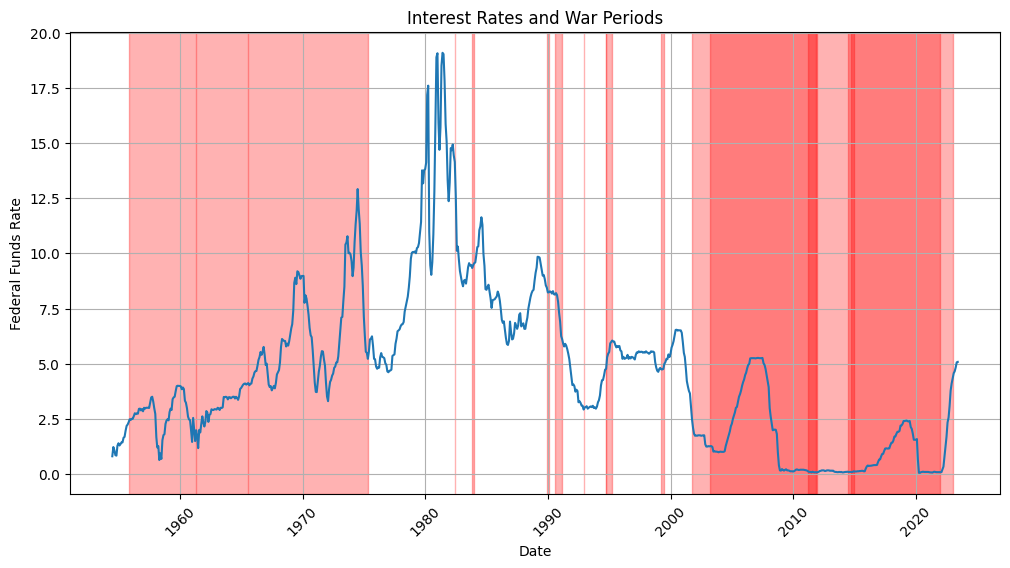

In [16]:
plt.figure(figsize=(12, 6))

plt.plot(df['date'], df['value'])

for start, end in wars:
    plt.axvspan(start, end, color='red', alpha=0.3)

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Federal Funds Rate')
plt.title('Interest Rates and War Periods')
plt.grid(True)
plt.show()

In [17]:
# Initialize an empty DataFrame with the desired column names
results = pd.DataFrame(columns=['War', 'Start Date', 'End Date', 'Start Rate', 'End Rate', 'Change'])

for start, end in wars:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    
    nearest_start_date = df.loc[df['date'] <= start_date, 'date'].max()
    nearest_end_date = df.loc[df['date'] >= end_date, 'date'].min()
    
    if pd.isnull(nearest_start_date) or pd.isnull(nearest_end_date):
        print(f"No matching dates found for the war period: {start} - {end}")
        continue
    
    start_rate = df.loc[df['date'] == nearest_start_date, 'value'].values[0]
    end_rate = df.loc[df['date'] == nearest_end_date, 'value'].values[0]
    
    change = end_rate - start_rate
    
    new_row = pd.DataFrame({
        'War': [f"{start} - {end}"],
        'Start Date': [nearest_start_date],
        'End Date': [nearest_end_date],
        'Start Rate': [start_rate],
        'End Rate': [end_rate],
        'Change': [change]
    })
    new_row = new_row.dropna(how='all')
    
    results = pd.concat([results, new_row], ignore_index=True)

C:\Users\tekso\AppData\Local\Temp\ipykernel_20000\135306218.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


In [18]:
results = results.drop_duplicates(subset=['War'])
print(results.to_string())
print("Average change in federal funds rate during war periods:", results['Change'].mean())
print("Minimum change in federal funds rate during war periods:", results['Change'].min())
print("Maximum change in federal funds rate during war periods:", results['Change'].max())

                        War Start Date   End Date  Start Rate  End Rate  Change
0   1955-11-01 - 1975-04-30 1955-11-01 1975-05-01        2.35      5.22    2.87
1   1961-04-17 - 1961-04-19 1961-04-01 1961-05-01        1.49      1.98    0.49
2   1965-07-28 - 1965-07-28 1965-07-01 1965-08-01        4.09      4.12    0.03
3   1982-06-06 - 1982-06-06 1982-06-01 1982-07-01       14.15     12.59   -1.56
4   1983-10-25 - 1983-12-15 1983-10-01 1984-01-01        9.48      9.56    0.08
5   1989-12-20 - 1990-01-31 1989-12-01 1990-02-01        8.45      8.24   -0.21
6   1990-08-02 - 1991-02-28 1990-08-01 1991-03-01        8.13      6.12   -2.01
7   1992-12-08 - 1992-12-08 1992-12-01 1993-01-01        2.92      3.02    0.10
8   1994-09-19 - 1994-09-19 1994-09-01 1994-10-01        4.73      4.76    0.03
9   1994-09-19 - 1995-03-31 1994-09-01 1995-04-01        4.73      6.05    1.32
10  1999-03-24 - 1999-06-10 1999-03-01 1999-07-01        4.81      4.99    0.18
11  2001-10-07 - 2014-12-28 2001-10-01 2